/ssd/users/kevin/conda/test_SNPmanifold/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


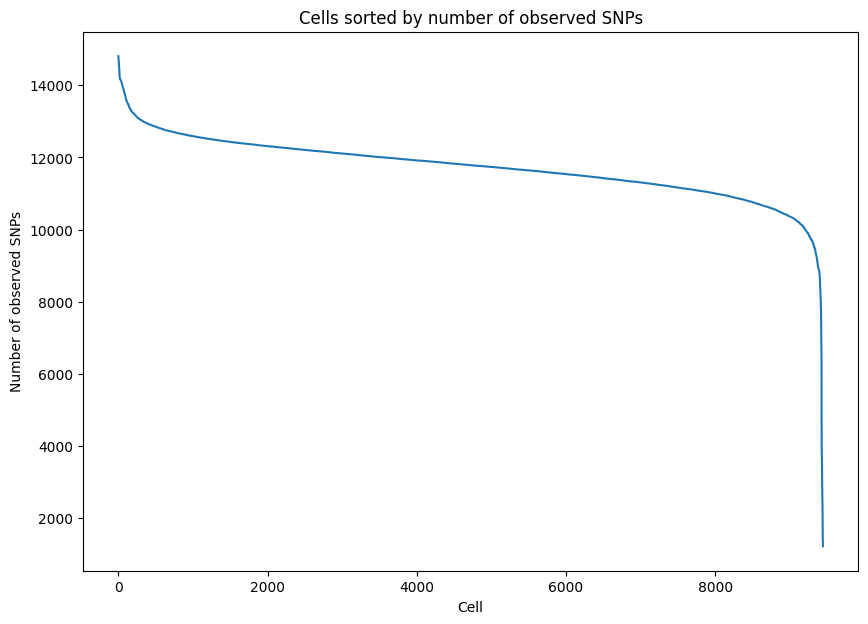

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   10000


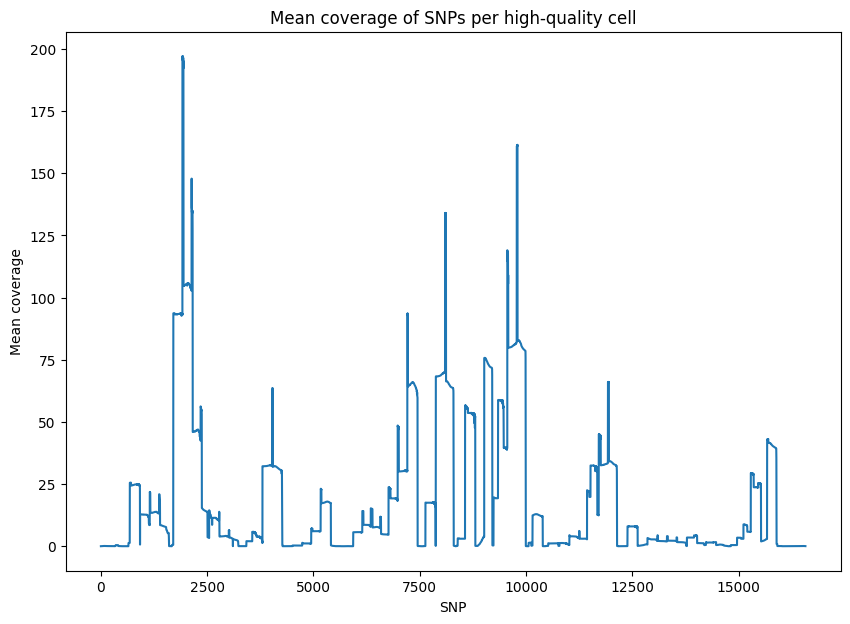

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   5


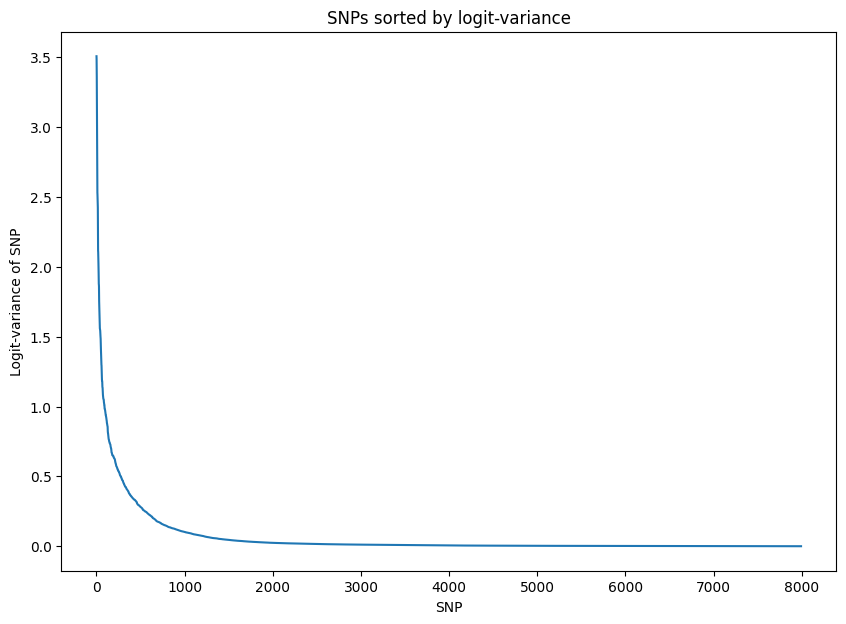

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0.5
Finish filtering low-quality data, 9204 cells and 274 SNPs will be used for downstream analysis.
Start training VAE.
Epoch[10/2000], Cost: 4.190243
Epoch[20/2000], Cost: 2.792134
Epoch[30/2000], Cost: 2.720560
Epoch[40/2000], Cost: 2.705299
Epoch[50/2000], Cost: 2.698174
Epoch[60/2000], Cost: 2.692146
Epoch[70/2000], Cost: 2.687458
Epoch[80/2000], Cost: 2.683789
Epoch[90/2000], Cost: 2.679959
Epoch[100/2000], Cost: 2.677168
Epoch[200/2000], Cost: 2.653099
Epoch[300/2000], Cost: 2.631697
Epoch[400/2000], Cost: 2.612062
Epoch[500/2000], Cost: 2.593070
Epoch[600/2000], Cost: 2.574184
Epoch[700/2000], Cost: 2.555067
Epoch[800/2000], Cost: 2.535930
Epoch[900/2000], Cost: 2.516880
Epoch[1000/2000], Cost: 2.497936
Epoch[1100/2000], Cost: 2.479440
Epoch[1200/2000], Cost: 2.461666
Epoch[1300/2000], Cost: 2.444886
Epoch[1400/2000], Cost: 2.429507
Epoch[1500/2000], Cost: 2.415871
Epoch[1600/200

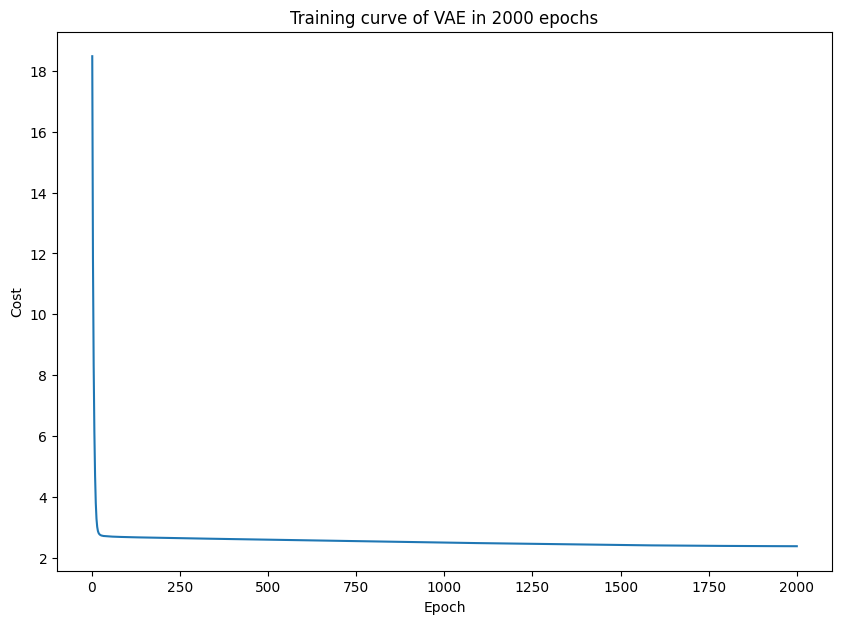

Start learning PCA and UMAP of latent space in VAE.
Finish learning, PCA and UMAP of latent space will be shown below.


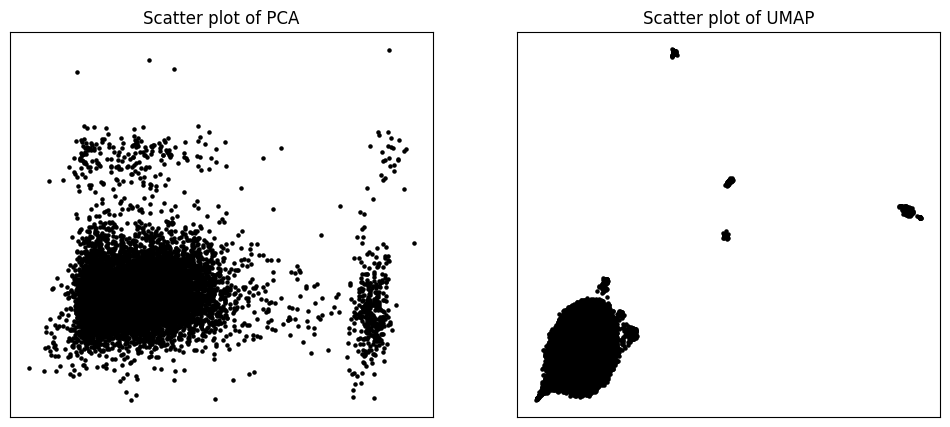

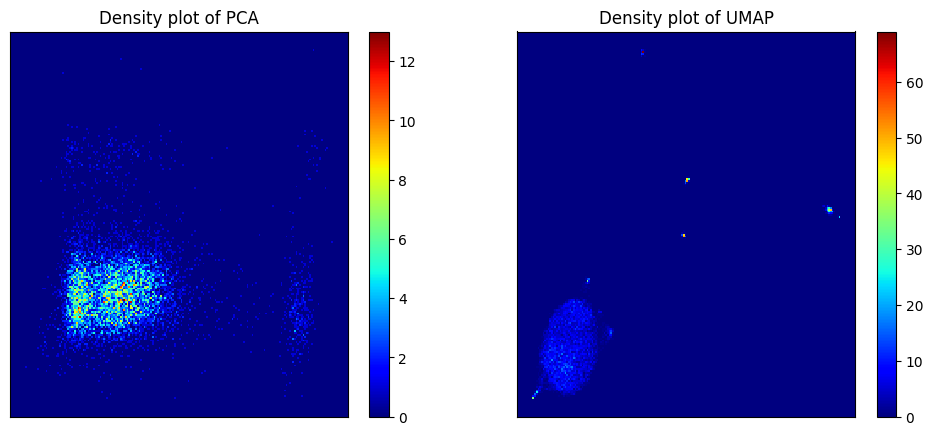

Start clustering.
Finish clustering.
PCA and UMAP of individual clusters will be shown below.


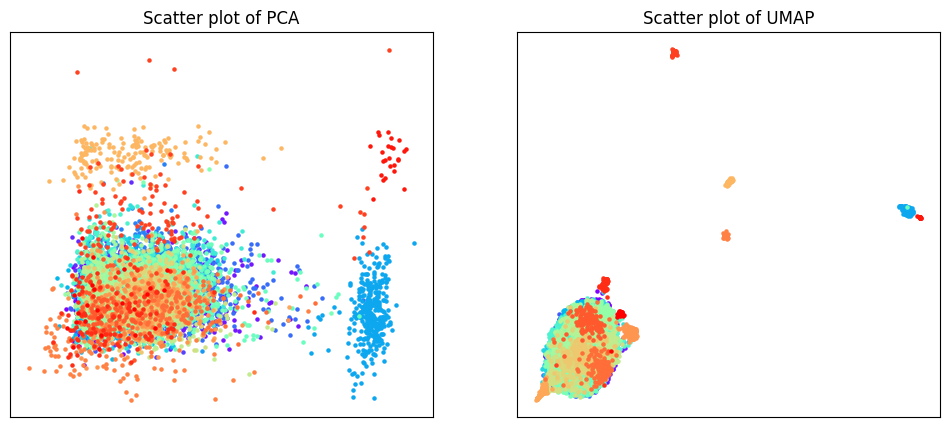

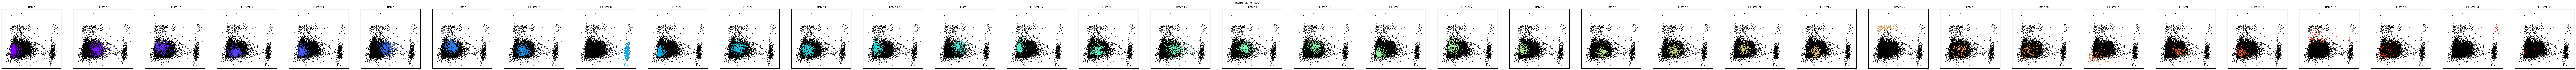

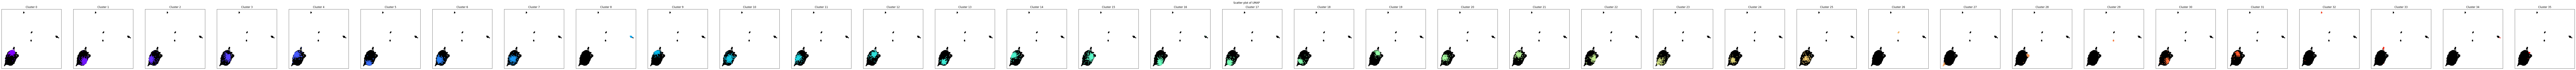

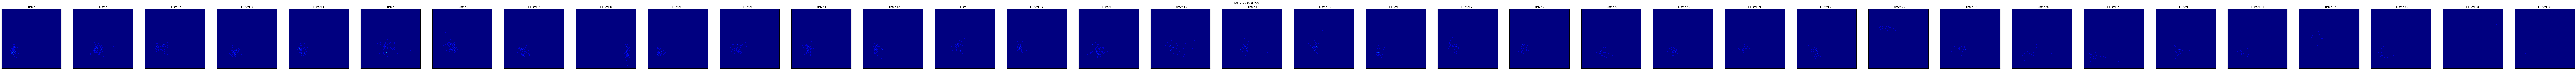

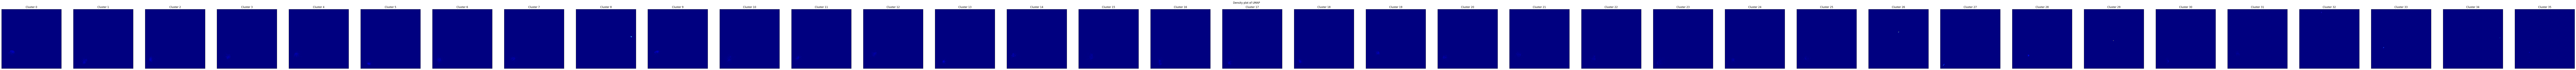

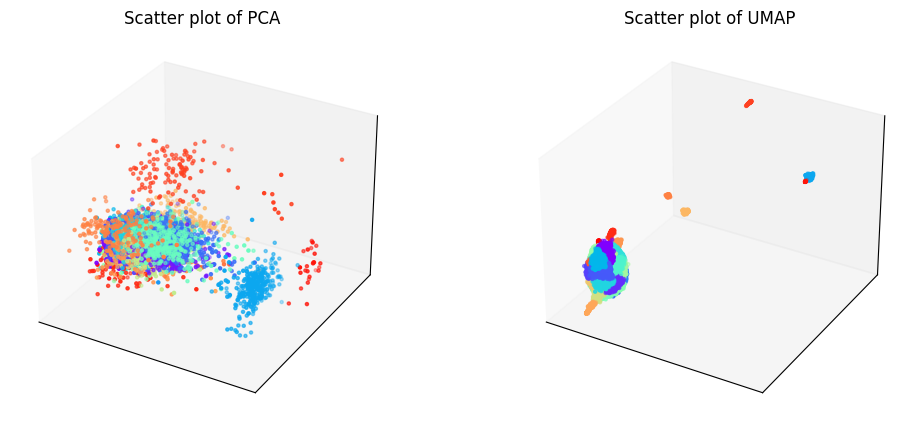

Phylogenetic tree in latent space will be shown below.


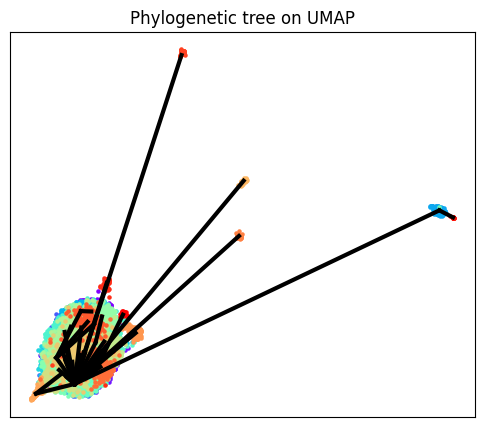

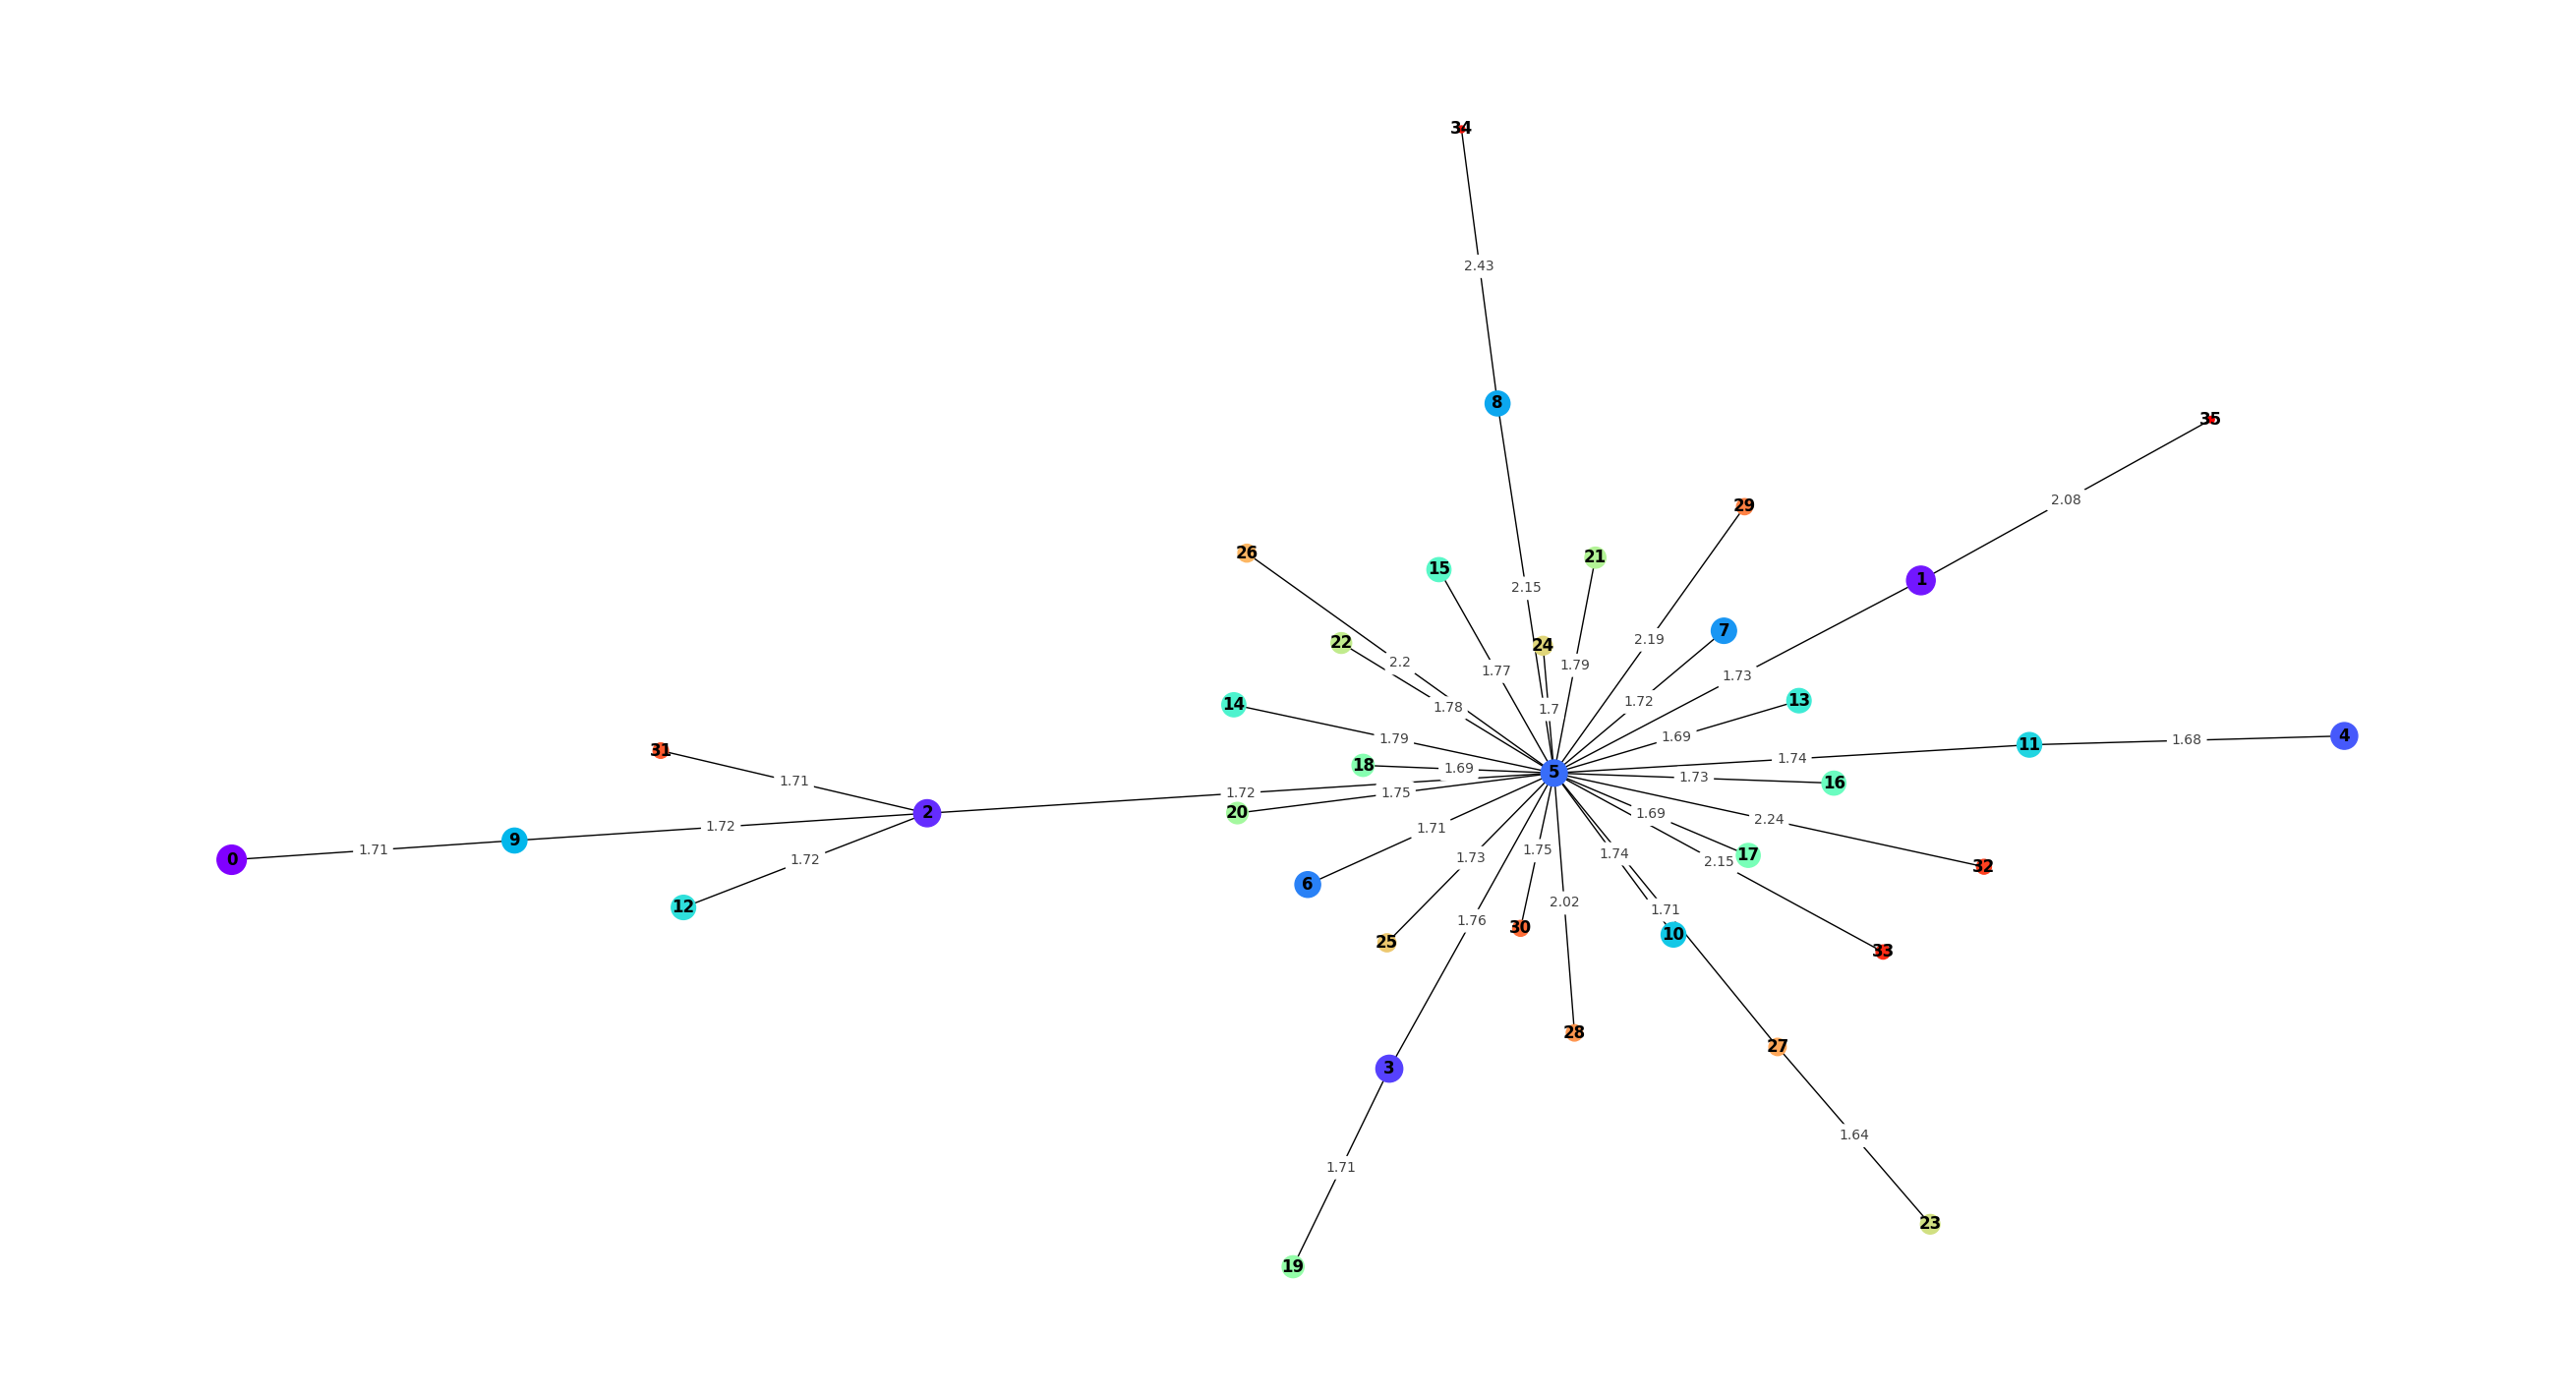

/tmp/ipykernel_3178479/2299804736.py:261: RuntimeWarning: divide by zero encountered in true_divide
  f_stat = np.clip(1 / ratio_logit_var, 1.001, 20)


SNP-allelic ratios of 9204 cells and 50 SNPs will be shown below.


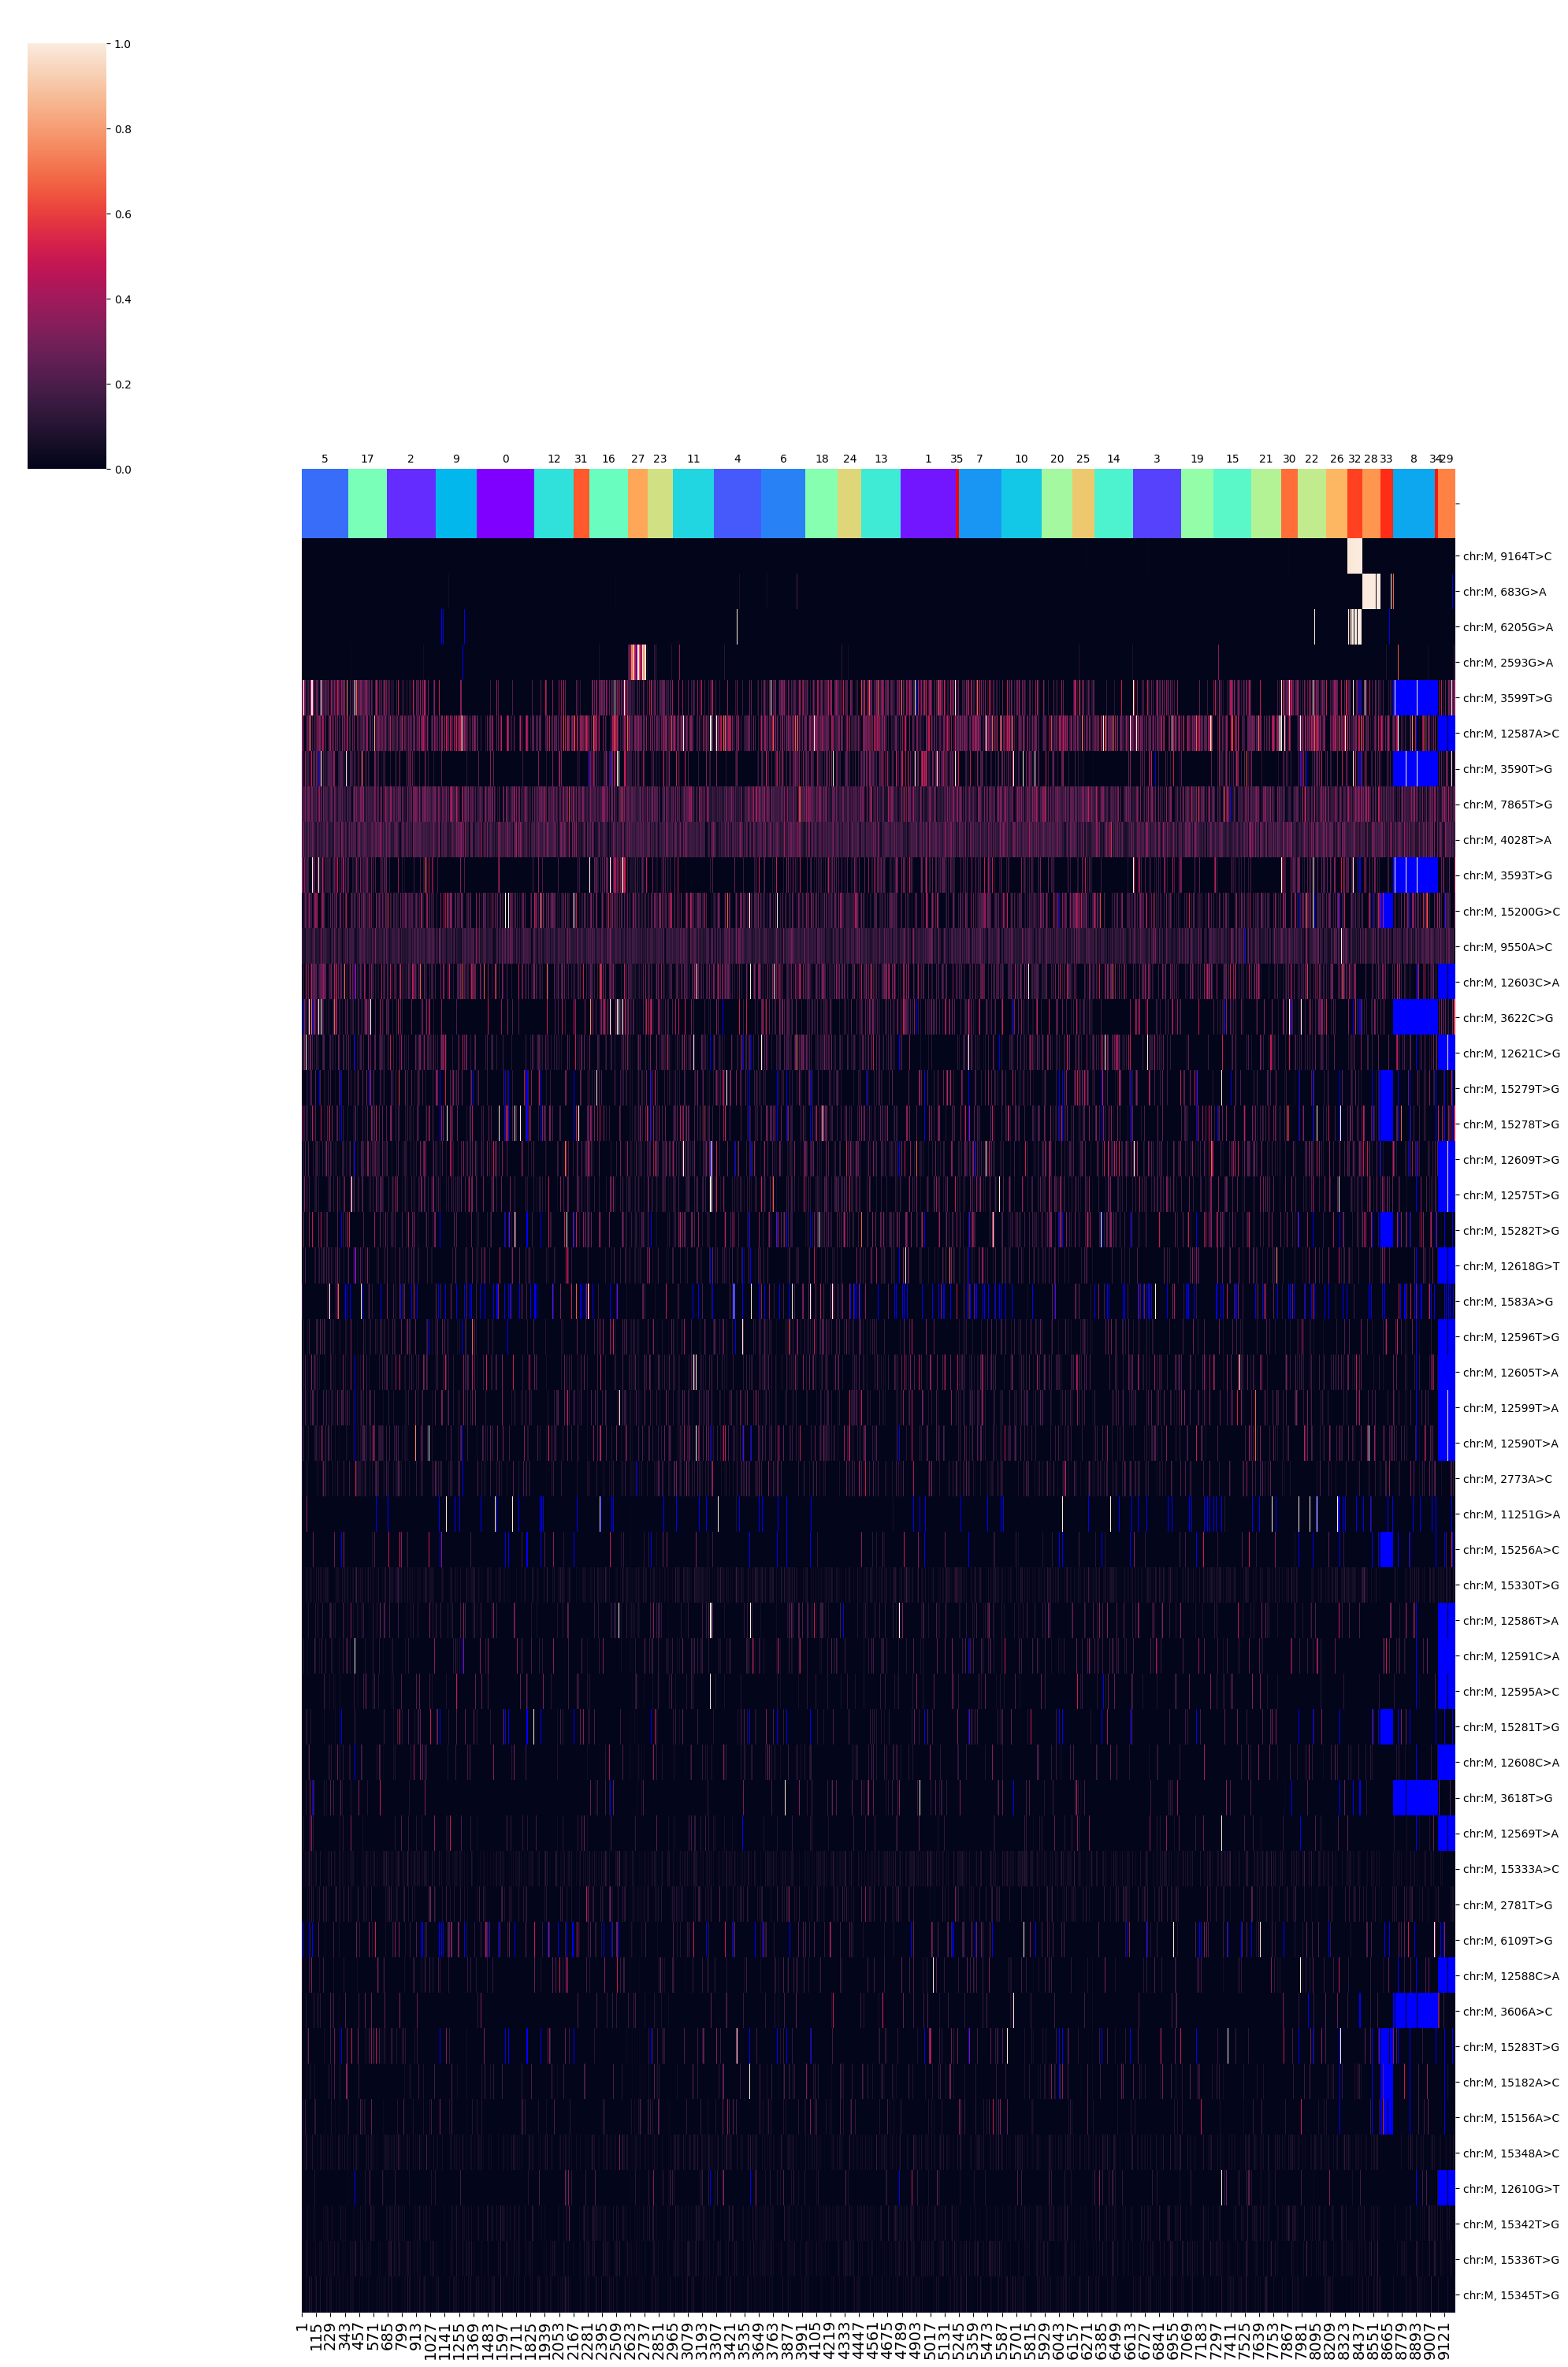

SNPs sorted by lowest p-value will be shown below


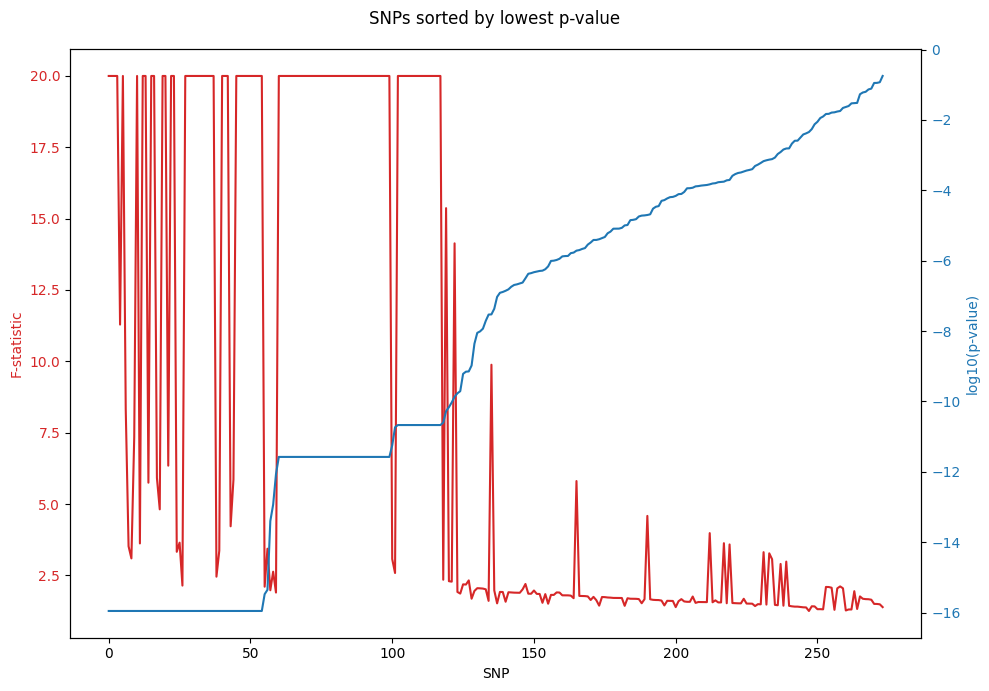

In [2]:
import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:4')

%run /home/kevin/storage_kevin/past_figures/figures_final7/notebook/SNPmanifold.ipynb
test1 = SNP_VAE(AD = "/home/kevin/storage_kevin/past_figures/figures_final2/data/BPDCN/cellSNP.tag.AD.mtx", DP = "/home/kevin/storage_kevin/past_figures/figures_final2/data/BPDCN/cellSNP.tag.DP.mtx", variant_name = "/home/kevin/storage_kevin/past_figures/figures_final2/data/BPDCN/variant_name.tsv")
test1.filtering()
test1.training()
test1.clustering()
test1.phylogeny()

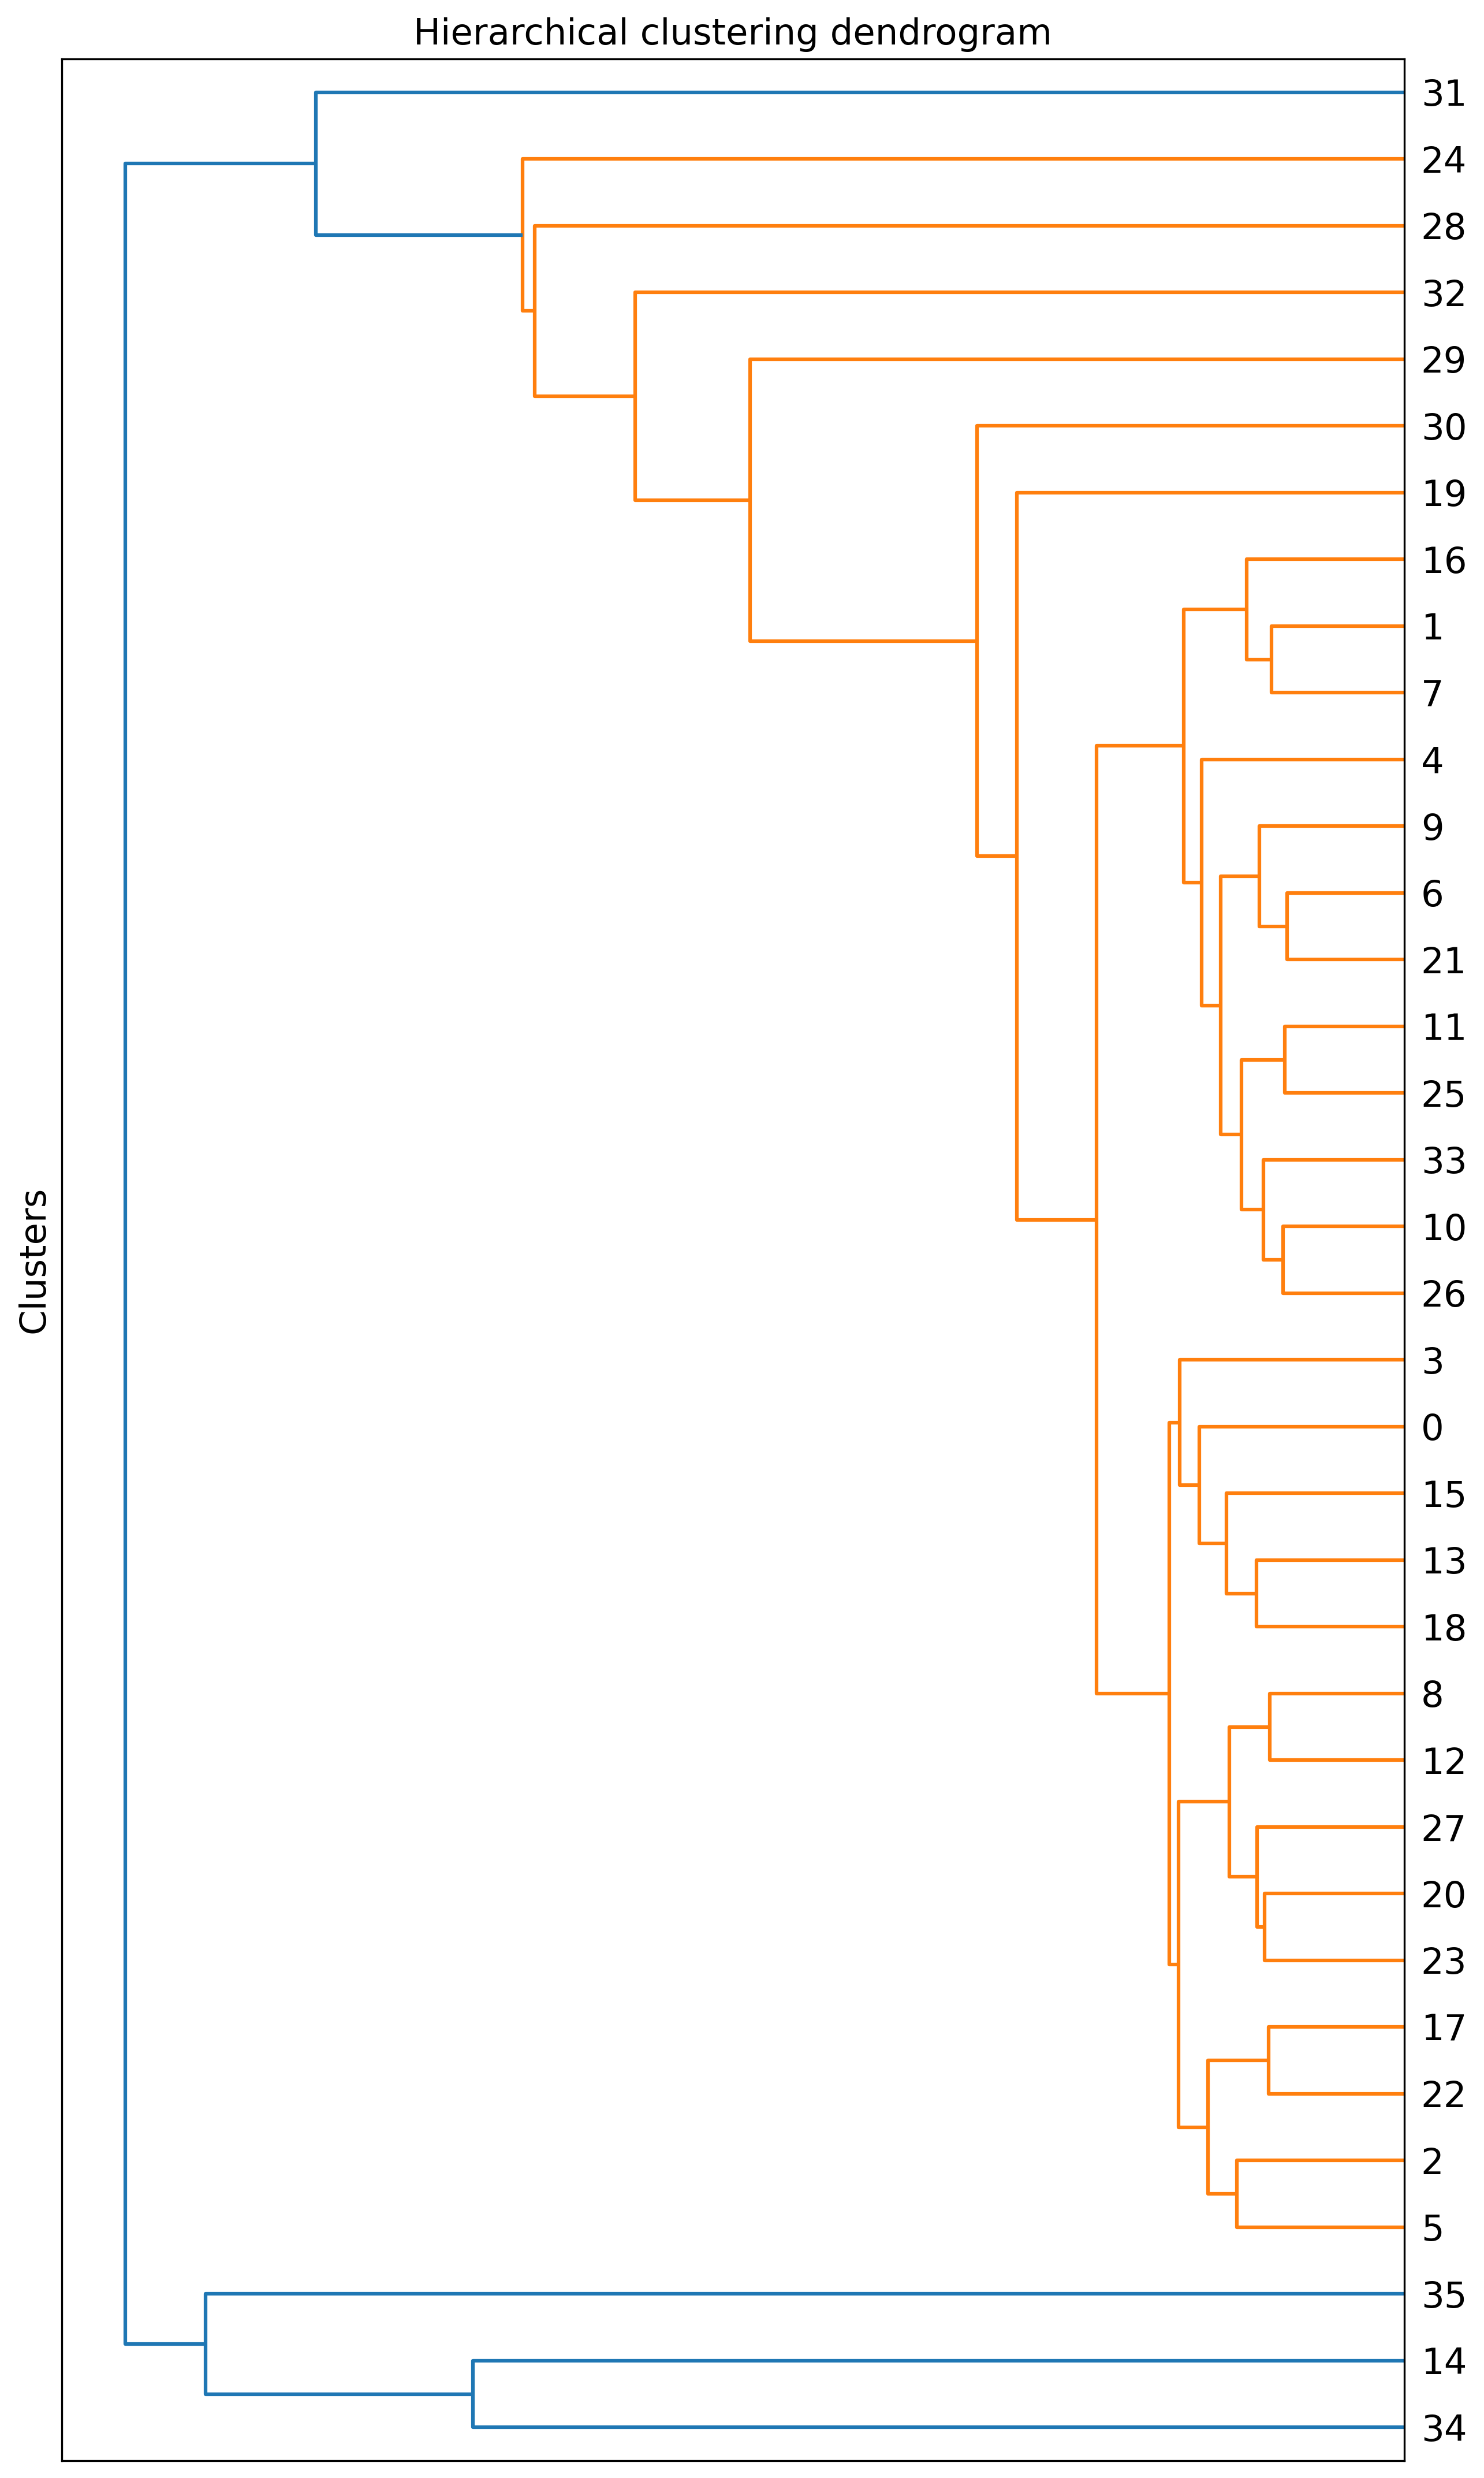

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram

assinged_label = np.genfromtxt("assigned_label.csv", delimiter=",").astype(int)

clusters = []

for w in range(np.max(assinged_label) + 1):
    
    clusters.append(np.where(assinged_label == w)[0])

centre_embedding_full = np.empty((np.max(assinged_label) + 1, test1.latent.shape[1]))
    
for w in range(np.max(assinged_label) + 1):
    
    centre_embedding_full[w, :] = np.mean(test1.latent[clusters[w], :], 0)

bifur_tree = linkage(centre_embedding_full, method='average')

fig, axs = plt.subplots(1, 1, figsize=(10, ((np.max(assinged_label) + 1) * 0.5)))
fig.set_dpi(300)

dendrogram(bifur_tree, orientation='left', labels=np.arange((np.max(assinged_label) + 1).astype(int)).astype(int), distance_sort='descending', show_leaf_counts=True, leaf_font_size = 15)

axs.set_title('Hierarchical clustering dendrogram', fontsize = 15)
axs.set_xticks([])
axs.set_ylabel('Clusters', fontsize = 15)
plt.show()

/ssd/users/kevin/conda/test_SNPmanifold/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


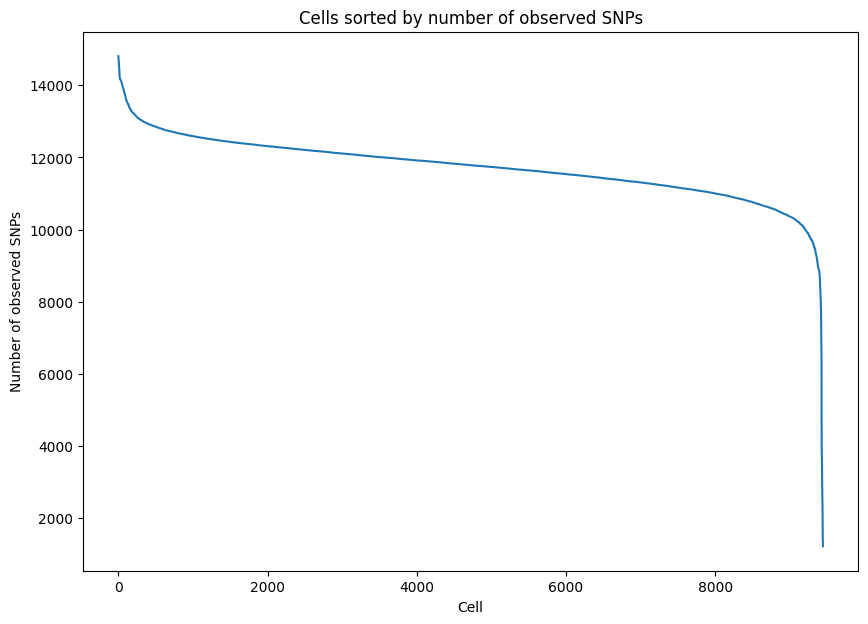

Please determine y-axis threshold in the plot to filter low-quality cells with low number of observed SNPs.   10000


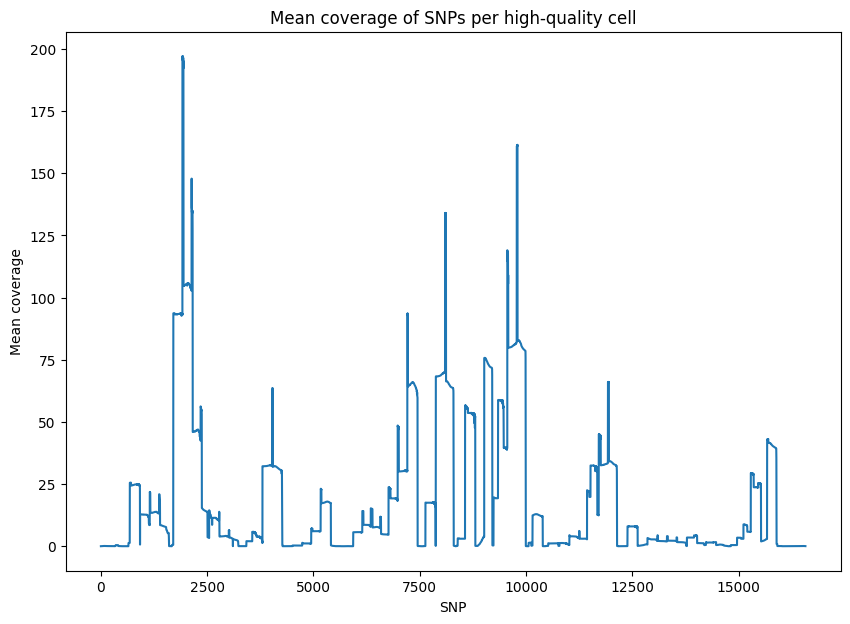

Please determine y-axis threshold in the plot to filter low-quality SNPs with low coverage.   5


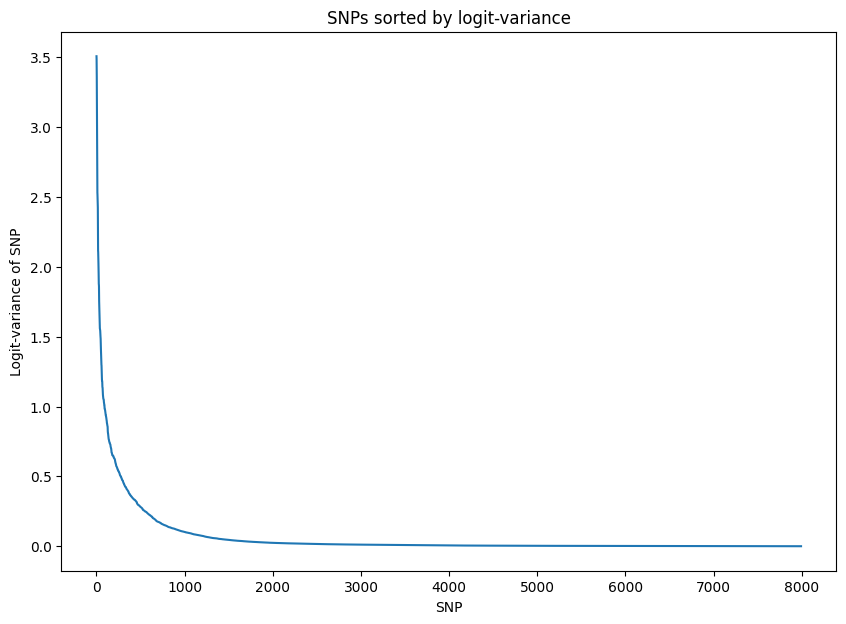

Please determine y-axis threshold in the plot to filter low-quality SNPs with low logit-variance.   0.5
Finish filtering low-quality data, 9204 cells and 274 SNPs will be used for downstream analysis.


In [1]:
import torch
torch.set_default_device('cuda')
torch.cuda.set_device('cuda:4')

%run /home/kevin/storage_kevin/past_figures/figures_final7/notebook/SNPmanifold.ipynb
test1 = SNP_VAE(AD = "/home/kevin/storage_kevin/past_figures/figures_final2/data/BPDCN/cellSNP.tag.AD.mtx", DP = "/home/kevin/storage_kevin/past_figures/figures_final2/data/BPDCN/cellSNP.tag.DP.mtx", variant_name = "/home/kevin/storage_kevin/past_figures/figures_final2/data/BPDCN/variant_name.tsv")
test1.filtering()

In [73]:
assinged_label = np.genfromtxt("assigned_label.csv", delimiter=",").astype(int)

In [8]:
refer = pd.read_csv("/home/kevin/storage_kevin/past_figures/figures_final7/data/BPDCN_filtered/GSM5534705_BPDCN712_10x_scRNAseq_MetaData.txt", delimiter = '\t')
sample = pd.read_csv("/home/kevin/storage_kevin/past_figures/figures_final7/data/BPDCN_filtered/sample.csv")

include = []
include_sample = []

for w in range(len(sample["sample"].to_list())):
    
    if sample["sample"].to_list()[w] in refer.index.to_numpy():
    
        include.append(np.where(refer.index.to_numpy() == sample["sample"].to_list()[w])[0][0])
        include_sample.append(True)
        
    elif sample["sample"].to_list()[w] not in refer.index.to_numpy():
    
        include_sample.append(False)


import collections
counter = collections.Counter(refer["CellType"].to_numpy()[include][test1.cell_filter[include_sample]])
counter.keys()

dict_keys(['cDC', 'T', 'CTL', 'NK', 'LateE', 'B', 'EarlyE', 'ProMono', 'pDC', 'Mono', 'ncMono', 'HSC', 'Plasma', 'Prog'])

In [54]:
refer_sorted = refer.loc[sample[test1.cell_filter][np.isin(sample[test1.cell_filter], refer.index).reshape(1, -1)[0]]['sample']]
assinged_label_sorted = assinged_label[np.isin(sample[test1.cell_filter], refer.index).reshape(1, -1)[0]]

In [61]:
refer_sorted['SNPmanifold'] = assinged_label_sorted

In [122]:
collections.Counter(refer_sorted['SNPmanifold'][refer_sorted["CellType"] == 'HSC'])

Counter({9: 1, 19: 4, 27: 1, 26: 2, 14: 1, 10: 2, 12: 1, 8: 1, 4: 1, 21: 1})

In [123]:
collections.Counter(refer_sorted['SNPmanifold'][refer_sorted["CellType"] == 'Prog'])

Counter({17: 1,
         16: 1,
         10: 2,
         4: 2,
         20: 1,
         19: 6,
         6: 1,
         26: 1,
         11: 1,
         21: 1,
         9: 1})

In [58]:
celltype = 'B'
label = 10

a = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted == label))
b = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted == label))
c = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted != label))
d = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted != label))

a, b, c, d, a * d / b / c

(17, 314, 141, 8654, 3.3228983150381715)

In [59]:
celltype = 'HSC'
label = 19

a = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted == label))
b = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted == label))
c = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted != label))
d = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted != label))

a, b, c, d, a * d / b / c

(4, 268, 11, 8843, 11.998643147896878)

In [130]:
celltype = ['HSC', 'Prog', 'ProMono', 'Mono', 'ncMono', 'EarlyE', 'LateE', 'cDC', 'pDC']
label = 19

a = np.sum(np.logical_and(np.isin(refer_sorted['CellType'], celltype), assinged_label_sorted == label))
b = np.sum(np.logical_and(~np.isin(refer_sorted['CellType'], celltype), assinged_label_sorted == label))
c = np.sum(np.logical_and(np.isin(refer_sorted['CellType'], celltype), assinged_label_sorted != label))
d = np.sum(np.logical_and(~np.isin(refer_sorted['CellType'], celltype), assinged_label_sorted != label))

a, b, c, d, a * d / b / c

(119, 153, 417, 8437, 15.736477484678923)

In [124]:
celltype = 'Prog'
label = 19

a = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted == label))
b = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted == label))
c = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted != label))
d = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted != label))

a, b, c, d, a * d / b / c

(6, 266, 12, 8842, 16.6203007518797)

In [ ]:
celltype = 'HSC'
label = 19

a = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted == label))
b = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted == label))
c = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted != label))
d = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted != label))

a, b, c, d, a * d / b / c

In [ ]:
celltype = 'HSC'
label = 19

a = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted == label))
b = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted == label))
c = np.sum(np.logical_and(refer_sorted['CellType'] == celltype, assinged_label_sorted != label))
d = np.sum(np.logical_and(refer_sorted['CellType'] != celltype, assinged_label_sorted != label))

a, b, c, d, a * d / b / c

In [66]:
TCR = pd.read_csv("/home/kevin/storage_kevin/past_figures/figures_final7/data/BPDCN_filtered/GSM5534712_BPDCN712_TCR_clonotypes.csv")

include_T = []
include_sample_T = []

for w in range(len(sample["sample"].to_list())):
    
    if sample["sample"].to_list()[w][:-2] in TCR["BC"].to_numpy():
    
        include_T.append(np.where(TCR["BC"].to_numpy() == sample["sample"].to_list()[w][:-2])[0][0])
        include_sample_T.append(True)
        
    elif sample["sample"].to_list()[w][:-2] not in TCR["BC"].to_numpy():
    
        include_sample_T.append(False)

counter = collections.Counter(TCR["TRB_CDR3"].to_numpy()[include_T][test1.cell_filter[include_sample_T]])
values = list(counter.values())
keys = list(counter.keys())

In [74]:
assinged_label[np.array(include_sample_T)[test1.cell_filter]].shape

(6567,)

In [70]:
TCR["TRB_CDR3"].to_numpy()[include_T][test1.cell_filter[include_sample_T]].shape

(6567,)

In [81]:
TCR_sorted = TCR.iloc[include_T][test1.cell_filter[include_sample_T]]
TCR_sorted['SNPmanifold'] = assinged_label[np.array(include_sample_T)[test1.cell_filter]]

In [85]:
TCR_sorted

,Unnamed: 0,BC,TCR_Recovery,TRB_CDR3,TRB_CDR3nuc,TRBV,TRBJ,TRA_CDR3,TRAV,TRAJ,TRA_CDR3nuc,TRA.2_CDR3,TRAV.2,TRAJ.2,TRA.2_CDR3nuc,SNPmanifold
865,AAACCCAGTAGTCTTG,AAACCCAGTAGTCTTG,TRA and TRB,CASSQAGAANTEAFF,TGTGCCAGCAGCCAAGCCGGGGCAGCGAACACTGAAGCTTTCTTT,TRBV4-2,TRBJ1-1,CAVNATNKLIFGT,TRAV8-1,TRAJ32,TGTGCCGTGAATGCTACAAACAAGCTCATCTTTGGAACT,NaN,NaN,NaN,NaN,19
4312,AAACCCAGTATACAGA,AAACCCAGTATACAGA,TRA and TRB,CASSYDRGYQPQHF,TGTGCCAGCAGTTACGACAGGGGGTATCAGCCCCAGCATTTT,TRBV6-6,TRBJ1-5,CAGYYGQNFVF,TRAV27,TRAJ26,TGTGCAGGCTACTATGGTCAGAATTTTGTCTTT,CAGLPERDMRF,TRAV27,TRAJ43,TGTGCAGGACTACCGGAACGGGACATGCGCTTT,19
2546,AAACCCAGTCATCACA,AAACCCAGTCATCACA,TRA and TRB,CASSDGQGARGYTF,TGTGCCAGCAGTGACGGACAGGGGGCGCGCGGCTACACCTTCGGTTC,TRBV6-6,TRBJ1-2,CAVSDQGAQKLVF,TRAV8-6,TRAJ54,TGTGCTGTGAGTGATCAGGGAGCCCAGAAGCTGGTATTT,NaN,NaN,NaN,NaN,11
5774,AAACCCAGTCATCCCT,AAACCCAGTCATCCCT,TRB only,CASSPLEANTGELFF,TGCGCCAGCAGCCCCTTGGAAGCTAACACCGGGGAGCTGTTTTTT,TRBV5-1,TRBJ2-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5273,AAACCCAGTCTTGCTC,AAACCCAGTCTTGCTC,TRB only,CASSLVEEKLFF,TGTGCCAGCAGTTTAGTCGAGGAAAAACTGTTTTTT,TRBV12-4,TRBJ1-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,TTTGTTGCACTGGACC,TTTGTTGCACTGGACC,TRB only,CASSLVEEKLFF,TGTGCCAGCAGTTTAGTCGAGGAAAAACTGTTTTTT,TRBV12-4,TRBJ1-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
2701,TTTGTTGGTTCCATTT,TTTGTTGGTTCCATTT,TRB only,CSAREGGASGVTGELFF,TGCAGTGCTAGAGAGGGTGGAGCGAGCGGGGTCACCGGGGAGCTGT...,TRBV20-1,TRBJ2-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
5295,TTTGTTGTCGGTTCAA,TTTGTTGTCGGTTCAA,TRA and TRB,CASSLVSGEVNEKLFF,TGTGCCAGCAGCTTAGTATCGGGGGAAGTTAATGAAAAACTGTTTTTT,TRBV11-2,TRBJ1-4,CAVRPVGNQFYF,TRAV21,TRAJ49,TGTGCTGTGAGGCCGGTCGGTAACCAGTTCTATTTT,NaN,NaN,NaN,NaN,18
4690,TTTGTTGTCGTGGGTC,TTTGTTGTCGTGGGTC,TRA and TRB,CASSQVGHSADTQYF,TGTGCCAGCAGCCAAGTGGGACACAGCGCAGATACGCAGTATTTT,TRBV14,TRBJ2-3,CATDPPRGGGGADGLTF,TRAV17,TRAJ45,TGTGCTACGGACCCCCCCCGGGGGGGAGGAGGTGCTGACGGACTCA...,NaN,NaN,NaN,NaN,14


In [120]:
celltype = 'CASSFRQGYNEQFF'
label = 29

a = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] == celltype, TCR_sorted['SNPmanifold'] == label))
b = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] != celltype, TCR_sorted['SNPmanifold'] == label))
c = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] == celltype, TCR_sorted['SNPmanifold'] != label))
d = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] != celltype, TCR_sorted['SNPmanifold'] != label))

a, b, c, d, a * d / b / c

(120, 8, 104, 6335, 913.7019230769231)

In [131]:
120 / 128

0.9375

In [121]:
celltype = 'CASSLEWGNPSTYEQYF'
label = 31

a = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] == celltype, TCR_sorted['SNPmanifold'] == label))
b = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] != celltype, TCR_sorted['SNPmanifold'] == label))
c = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] == celltype, TCR_sorted['SNPmanifold'] != label))
d = np.sum(np.logical_and(TCR_sorted['TRB_CDR3'] != celltype, TCR_sorted['SNPmanifold'] != label))

a, b, c, d, a * d / b / c

(85, 7, 5, 6470, 15712.857142857141)

In [132]:
85 / 92

0.9239130434782609

In [75]:
TCR.columns

Index(['Unnamed: 0', 'BC', 'TCR_Recovery', 'TRB_CDR3', 'TRB_CDR3nuc', 'TRBV',
       'TRBJ', 'TRA_CDR3', 'TRAV', 'TRAJ', 'TRA_CDR3nuc', 'TRA.2_CDR3',
       'TRAV.2', 'TRAJ.2', 'TRA.2_CDR3nuc'],
      dtype='object')